<a href="https://colab.research.google.com/github/midibaks/ChicagoGroceries/blob/main/ChicagoGroceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mapclassify
import mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00


,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry,index_right,community
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT ((1168268.672 1933554.35)),30,UPTOWN
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT ((1162302.618 1832900.224)),73,MORGAN PARK
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT ((1173317.042 1895425.426)),28,NEAR WEST SIDE
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT ((1168996.475 1898801.406)),28,NEAR WEST SIDE
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT ((1176991.989 1847262.423)),39,CHATHAM


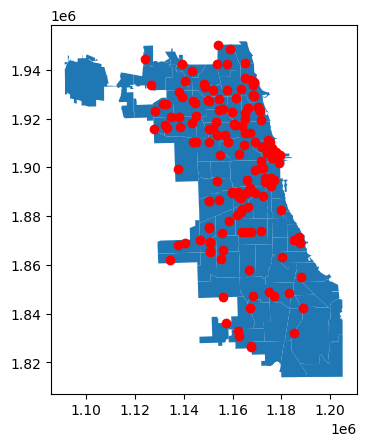

In [ ]:
chicago = gpd.read_file(gds.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(gds.get_path("geoda.groceries"))

chicago_shapes = chicago[['geometry', 'NID']]
chicago_names = chicago[['community', 'NID']]

chicago = chicago[['geometry', 'community']].to_crs(groceries.crs)

ax = chicago.plot()
groceries.plot(ax = ax, color="red")

groceries_with_community = groceries.sjoin(chicago, how="inner", predicate='intersects')
groceries_with_community.head()